"Un circuito LRC con R=150 ohmios, L= 1 Henrio, C=0,0002 faradios en t=0 se le aplica un voltaje que crece linealmente de 0 a 100 voltios, durante 10 segundos, para luego cesar por tiempo indefinido. Si inicialmente no hay carga en el condensador y la corriente inicial es cero, determine: a) La carga en cualquier instante de tiempo b) La corriente del circuito en t=20s"


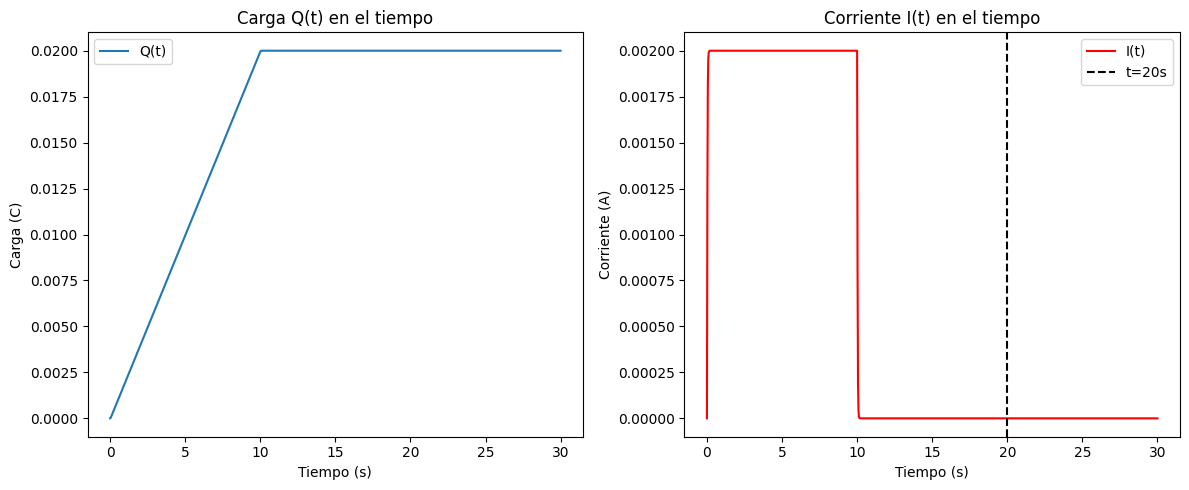

Carga a los 20 segundos Q(20) 0.0200
Corriente a los 20 segundos I(20) 8.448762327946775e-12 aproximadamente 0.000000


In [8]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
# Parámetros del circuito
R = 150
L = 1
C = 0.0002
# Función de voltaje V(t)
def V(t):
    if t <= 10:
        return 10 * t
    else:
        return 100
# Ecuaciones diferenciales de primer orden para resolver el sistema
def dU_dt(U, t):
    Q, I = U
    dQ_dt = I
    dI_dt = (V(t) - R * I - Q / C) / L
    return [dQ_dt, dI_dt]
# Condiciones iniciales
U0 = [0, 0]  # Q(0) = 0, I(0) = 0
# Tiempo de simulación
t = np.linspace(0, 30, 1000)  # Simular de 0 a 30 segundos
# Resolución numérica
sol = scipy.integrate.odeint(dU_dt, U0, t)
# Extracción de las soluciones
Q = sol[:, 0]  # Carga Q(t)
I = sol[:, 1]  # Corriente I(t)

# Resultado a t = 20s
t_20 = 20
Q_20 = np.interp(t_20, t, Q)
I_20 = np.interp(t_20, t, I)

# Mostrar los resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, Q, label='Q(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Carga (C)')
plt.title('Carga Q(t) en el tiempo')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, I, label='I(t)', color='r')
plt.axvline(x=t_20, color='k', linestyle='--', label=f't={t_20}s')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.title('Corriente I(t) en el tiempo')
plt.legend()

plt.tight_layout()
plt.show()


print(f"Carga a los 20 segundos Q(20) {Q_20:.4f}")
print(f"Corriente a los 20 segundos I(20) {I_20} aproximadamente {I_20:.6f}")
